<a href="https://colab.research.google.com/github/Snehanjan2001/image_recomender/blob/main/ImgDetecYOLO8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using pretrained

In [ ]:
!pip install opencv-python ultralytics numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO
import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = YOLO("yolov8x-seg.pt")


In [ ]:

img = cv2.imread("/content/DJI_0003.JPG")

yolo_classes = list(model.names.values())
classes_ids = [yolo_classes.index(clas) for clas in yolo_classes]

conf = 0.5
results = model.predict(img, conf=conf)
colors = [random.choices(range(256), k=3) for _ in classes_ids]

for result in results:
    for mask, box in zip(result.masks.xy, result.boxes):
        points = np.int32([mask])
        color_number = classes_ids.index(int(box.cls[0]))
        cv2.fillPoly(img, points, colors[color_number])

cv2_imshow(img)
cv2.imwrite("DJI_0003_dec.JPG", img)

## Using Custom Trained

### Checking availability of GPU

In [ ]:
!nvidia-smi

Fri Aug  1 05:42:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Installation

In [ ]:
!pip install ultralytics roboflow ezdxf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 

In [ ]:
!rm -rf runs

### Importing the dataset in required format from Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PYrMZe4s3MGxq57uEoo4")
project = rf.workspace("snehanjantest").project("my-first-project-hvjyw")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-1 in yolov8:: 100%|██████████| 25/25 [00:00<00:00, 3841.36it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### YOLOv8 Segmentation Training Overview

This process trains a YOLOv8 segmentation model using Ultralytics' PyTorch-based framework. The model learns to detect and segment objects from a custom dataset in COCO instance format.

### Training Configuration and Model Selection

You can choose from different segmentation-capable models depending on your accuracy and speed requirements:

| Model Name     | Size     | Speed     | Accuracy | Use Case                  |
|----------------|----------|-----------|----------|---------------------------|
| `yolov8n-seg`  | Nano     | Fastest | Low    | Mobile, edge devices      |
| `yolov8s-seg`  | Small    | Fast    | Medium | Real-time applications     |
| `yolov8m-seg`  | Medium   | Balanced| Good   | General-purpose tasks     |
| `yolov8l-seg`  | Large    | Slower | High   | High-accuracy tasks       |
| `yolov8x-seg`  | X-Large  | Slowest| Best   | Maximum precision (server) |

To change the model used for training, simply replace the model name:

```python
model = YOLO("yolov8s-seg.pt")  # Change to yolov8n/m/l/x-seg.pt as needed


In [ ]:
from ultralytics import YOLO
import time

start_time = time.time()
model = YOLO("yolov8x-seg.pt")

model.train(
    data="/content/My-First-Project-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="custom_yolov8"
)

end_time = time.time()
tr_time = end_time-start_time

100%|██████████| 137M/137M [00:02<00:00, 62.6MB/s]


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/My-First-Project-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              


  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280

100%|██████████| 5.35M/5.35M [00:00<00:00, 117MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1410.3±380.2 MB/s, size: 65.7 KB)


train: Scanning /content/My-First-Project-1/train/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 523.70it/s]

train: New cache created: /content/My-First-Project-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 270.9±0.0 MB/s, size: 42.0 KB)


val: Scanning /content/My-First-Project-1/valid/labels... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<00:00, 109.23it/s]

val: New cache created: /content/My-First-Project-1/valid/labels.cache


Plotting labels to runs/segment/custom_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/custom_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.57G      1.074       4.26      3.651      1.343        113        640: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all          1         17          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.59G      1.214      5.296      3.822      1.553        101        640: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


                   all          1         17          0          0          0          0          0          0          0          0

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.61G      1.199      4.868      3.737      1.574         86        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all          1         17          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.63G      1.297      4.833      3.838      1.543        105        640: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.29it/s]

                   all          1         17          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.71G      1.362      4.745      3.832      1.572        130        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.81it/s]

                   all          1         17    0.00175     0.0667     0.0012   0.000481    0.00175     0.0667     0.0012   0.000601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.63G      1.089      4.059      3.465      1.444         99        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.14it/s]

                   all          1         17    0.00182     0.0667    0.00122   0.000489    0.00182     0.0667    0.00122   0.000612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.57G     0.9974      4.346      3.344      1.393         96        640: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]

                   all          1         17      0.013      0.267     0.0843     0.0338    0.00745      0.167      0.056     0.0166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.58G      0.964      3.184      2.547      1.355        103        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.68it/s]

                   all          1         17      0.373      0.195      0.216     0.0762      0.285     0.0667      0.072     0.0128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.66G      1.053      3.168      2.281      1.394        125        640: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.16it/s]

                   all          1         17      0.491        0.1       0.17     0.0724      0.323      0.133     0.0959     0.0251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.49G     0.6808      3.531      1.818      1.189         82        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.09it/s]

                   all          1         17       0.77      0.167       0.14     0.0598      0.474      0.167     0.0534     0.0302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50       7.4G     0.9753      3.382      1.935      1.253        144        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          1         17      0.528        0.2      0.151     0.0774      0.457      0.167      0.089     0.0475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.42G      1.013      2.931      1.919      1.305        127        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.06it/s]

                   all          1         17      0.314      0.535      0.234      0.132       0.39      0.333      0.193     0.0924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.37G     0.8285       2.21      1.506      1.179        122        640: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all          1         17      0.463      0.433      0.303      0.153      0.452        0.4      0.253      0.099



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.58G     0.8212      2.349      1.364      1.205        119        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          1         17      0.455        0.4      0.402      0.189      0.468       0.39      0.393      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.38G     0.6614      1.834      1.095      1.074        119        640: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.17it/s]

                   all          1         17        0.9        0.2      0.394      0.186        0.9        0.2      0.383      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.72G     0.6746      1.652      1.127      1.088        122        640: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.14it/s]

                   all          1         17      0.561      0.167       0.24      0.163      0.589      0.267      0.328      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.62G     0.6981      1.799      1.093      1.114        108        640: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.19it/s]

                   all          1         17      0.403      0.367      0.258      0.154      0.663      0.218      0.349      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.51G      0.769      1.819      1.433      1.235         85        640: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]

                   all          1         17      0.403      0.367      0.258      0.154      0.663      0.218      0.349      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.72G     0.6771      1.557       1.23      1.067        148        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.78it/s]

                   all          1         17      0.511        0.3      0.293      0.152       0.57      0.381      0.384      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.32G     0.7053      1.748      1.187      1.174        101        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.22it/s]

                   all          1         17      0.511        0.3      0.293      0.152       0.57      0.381      0.384      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.25G      0.702      1.609      1.129      1.148        110        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all          1         17      0.497      0.233      0.271      0.137      0.563      0.333      0.361      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.25G     0.6987      1.902      1.083      1.126         92        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.24it/s]

                   all          1         17      0.497      0.233      0.271      0.137      0.563      0.333      0.361      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.59G     0.6238      1.547     0.9265      1.112        107        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]

                   all          1         17      0.468      0.233      0.255      0.142       0.51      0.333      0.344       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.71G     0.8337      1.512      1.011      1.154        143        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          1         17      0.468      0.233      0.255      0.142       0.51      0.333      0.344       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.69G     0.6531      1.562     0.9516      1.089        120        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.78it/s]

                   all          1         17      0.462      0.267      0.223      0.134      0.489      0.333      0.263      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.26G     0.6701      1.542      1.049      1.179         79        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all          1         17      0.462      0.267      0.223      0.134      0.489      0.333      0.263      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.58G     0.7678      1.208       1.01      1.142        108        640: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.46it/s]

                   all          1         17      0.451      0.267      0.228      0.136      0.495      0.367      0.278      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.54G     0.7031      1.389      1.004      1.163         97        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all          1         17      0.451      0.267      0.228      0.136      0.495      0.367      0.278      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.59G     0.6484      1.139     0.9385      1.038         89        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.48it/s]

                   all          1         17      0.487       0.26      0.256      0.168      0.543      0.358      0.355      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.53G     0.6649      1.238     0.9802       1.12         85        640: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.82it/s]

                   all          1         17      0.487       0.26      0.256      0.168      0.543      0.358      0.355      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.59G     0.6075      1.757     0.9572      1.132         91        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.61it/s]

                   all          1         17      0.505      0.267      0.256      0.159      0.558       0.36      0.356      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.68G     0.7343      1.333     0.8909      1.072        154        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all          1         17      0.505      0.267      0.256      0.159      0.558       0.36      0.356      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.63G     0.7161       1.45     0.9415      1.163        108        640: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all          1         17      0.506      0.267      0.248      0.133      0.546      0.366      0.364       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.54G     0.6445      1.226     0.8097      1.026        122        640: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]

                   all          1         17      0.506      0.267      0.248      0.133      0.546      0.366      0.364       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.61G     0.7781      1.539     0.9519      1.157         93        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]

                   all          1         17      0.299      0.264      0.248      0.133      0.334      0.362       0.37      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.38G      0.723      1.424     0.8613      1.073        118        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.37it/s]

                   all          1         17      0.299      0.264      0.248      0.133      0.334      0.362       0.37      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       7.6G     0.6781      1.306     0.7871      1.105        101        640: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.98it/s]

                   all          1         17      0.254      0.267      0.262      0.134      0.294      0.366      0.348      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50       7.6G     0.8225      1.426     0.9226      1.171        128        640: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]

                   all          1         17      0.254      0.267      0.262      0.134      0.294      0.366      0.348      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.65G     0.5895      1.159     0.7435      1.059        106        640: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.90it/s]

                   all          1         17       0.23      0.267      0.249      0.131      0.267      0.367      0.349      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.31G     0.7259        1.4     0.8305      1.089        103        640: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.50it/s]

                   all          1         17       0.23      0.267      0.249      0.131      0.267      0.367      0.349      0.128


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.87G      0.611       1.14     0.8787      1.026         53        640: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all          1         17      0.489        0.2      0.252      0.127      0.551        0.3      0.356      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.43G     0.7788        1.3     0.9202      1.229         53        640: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          1         17      0.489        0.2      0.252      0.127      0.551        0.3      0.356      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50       7.5G      0.537      0.954     0.7514     0.9738         53        640: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all          1         17       0.43      0.276       0.26      0.127      0.627        0.3      0.375      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.44G     0.5984      1.035      0.794      1.024         54        640: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all          1         17       0.43      0.276       0.26      0.127      0.627        0.3      0.375      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.51G     0.5221     0.9961      0.697     0.9706         55        640: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all          1         17      0.424        0.3      0.268      0.145      0.565      0.424      0.423      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.44G     0.5729      1.181      0.772      1.046         50        640: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]

                   all          1         17      0.424        0.3      0.268      0.145      0.565      0.424      0.423      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.48G     0.5554     0.9396     0.7811      1.044         53        640: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.48it/s]

                   all          1         17      0.435        0.3      0.294       0.17      0.581      0.425      0.443      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.44G     0.6158      1.164     0.7706      1.147         54        640: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          1         17      0.435        0.3      0.294       0.17      0.581      0.425      0.443      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.45G     0.5031     0.9217     0.6048     0.9443         53        640: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]

                   all          1         17      0.431        0.3      0.311      0.181      0.587      0.434      0.451      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.22G     0.4612     0.8232     0.6177     0.9722         53        640: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.37it/s]

                   all          1         17      0.431        0.3      0.311      0.181      0.587      0.434      0.451      0.165



50 epochs completed in 0.071 hours.
Optimizer stripped from runs/segment/custom_yolov8/weights/last.pt, 144.0MB
Optimizer stripped from runs/segment/custom_yolov8/weights/best.pt, 144.0MB

Validating runs/segment/custom_yolov8/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 125 layers, 71,726,434 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]


                   all          1         17      0.431        0.3      0.308      0.179      0.587      0.433      0.451      0.167
              building          1          3          1          0          0          0          1          0     0.0471     0.0141
              greenery          1          6       0.47      0.833      0.638      0.461      0.458      0.707      0.591      0.331
                  road          1          2          0          0          0          0      0.475        0.5       0.62      0.277
              sidewalk          1          3          0          0      0.126      0.042          0          0          0          0
               vehicle          1          3      0.685      0.667      0.775      0.394          1      0.959      0.995      0.211
Speed: 0.5ms preprocess, 67.4ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/segment/custom_yolov8


### Metric Calculation

In [ ]:
print("Training time : ",tr_time)

Training time :  288.28513979911804


In [ ]:
from ultralytics import YOLO
model = YOLO("runs/segment/custom_yolov8/weights/best.pt")  # or "best.pt" if you're in the same directory

In [ ]:
metrics = model.val(data="/content/My-First-Project-1/data.yaml", split="val")
seg_metrics = metrics.seg

print("Segmentation Metrics:")
print(f"Precision (mp):      {seg_metrics.mp:.4f}")
print(f"Recall (mr):         {seg_metrics.mr:.4f}")
print(f"mAP@0.5 (map50):     {seg_metrics.map50:.4f}")
print(f"mAP@0.5:0.95 (map):  {seg_metrics.map:.4f}")

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 125 layers, 71,726,434 parameters, 0 gradients, 343.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1083.8±0.0 MB/s, size: 42.0 KB)


val: Scanning /content/My-First-Project-1/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


                   all          1         17      0.431        0.3      0.289      0.172      0.586      0.434      0.451       0.16
              building          1          3          1          0          0          0          1          0     0.0472     0.0142
              greenery          1          6      0.471      0.833      0.638      0.461      0.458      0.708      0.591      0.324
                  road          1          2          0          0          0          0      0.473        0.5       0.62      0.266
              sidewalk          1          3          0          0      0.126     0.0421          0          0          0          0
               vehicle          1          3      0.685      0.667      0.683      0.359          1       0.96      0.995      0.196
Speed: 0.7ms preprocess, 88.1ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/segment/val
Segmentation Metrics:
Precision (mp):      0.5864
Recall (mr):         0.4336
mAP@0.5

#### Custom IOU calculation on valid dataset

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from glob import glob

# Load model
model = YOLO("runs/segment/custom_yolov8/weights/best.pt")

# Paths
val_images = sorted(glob("/content/My-First-Project-1/valid/images/*.jpg"))
val_labels = sorted(glob("/content/My-First-Project-1/valid/labels/*.txt"))

# Image size (YOLO resizes to 640x640 or your imgsz)
imgsz = 640

# Utility: Create binary mask from YOLOv8 polygon annotation
def create_mask_from_yolo_label(label_file, shape):
    mask = np.zeros(shape, dtype=np.uint8)

    with open(label_file, "r") as f:
        lines = f.readlines()

    h, w = shape
    for line in lines:
        items = list(map(float, line.strip().split()))
        cls_id = int(items[0])
        points = items[1:]

        # Convert normalized coords to pixel values
        xy = np.array(points).reshape(-1, 2)
        xy[:, 0] *= w
        xy[:, 1] *= h
        xy = xy.astype(np.int32)

        cv2.fillPoly(mask, [xy], color=1)

    return mask.astype(bool)

# Compute IoU
def compute_iou(pred, gt):
    inter = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return inter / union if union > 0 else 1.0

# Inference and comparison
ious = []

for img_path, label_path in zip(val_images, val_labels):
    # Run prediction
    results = model.predict(img_path, imgsz=imgsz, save=False, conf=0.5)
    pred_masks = results[0].masks.data.cpu().numpy().astype(bool)  # shape: [N, H, W]

    # Load GT mask
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    gt_mask = create_mask_from_yolo_label(label_path, (h, w))

    # Compute IoU for each predicted mask against GT
    for pred_mask in pred_masks:
        pred_resized = cv2.resize(pred_mask.astype(np.uint8), (w, h)).astype(bool)
        iou = compute_iou(pred_resized, gt_mask)
        ious.append(iou)

# Final stats
mean_iou = np.mean(ious)
print(f"\n✅ Mean IoU over validation set: {mean_iou:.4f}")



image 1/1 /content/My-First-Project-1/valid/images/Handhole-OrthoPhoto-8_png.rf.8f3c40276ab05e2fce45e2328975133b.jpg: 640x640 5 greenerys, 1 road, 3 sidewalks, 2 vehicles, 106.4ms
Speed: 2.5ms preprocess, 106.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

✅ Mean IoU over validation set: 0.0792


### Inferencing

In [ ]:
results = model.predict(
    source="/content/test.png",  # path to the image
    conf=0.5,                          # confidence threshold
    save=True                          # saves image with predictions
)



image 1/1 /content/test.png: 448x640 1 divider, 4 greenerys, 2 roads, 3 sidewalks, 64.4ms
Speed: 2.6ms preprocess, 64.4ms inference, 12.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict


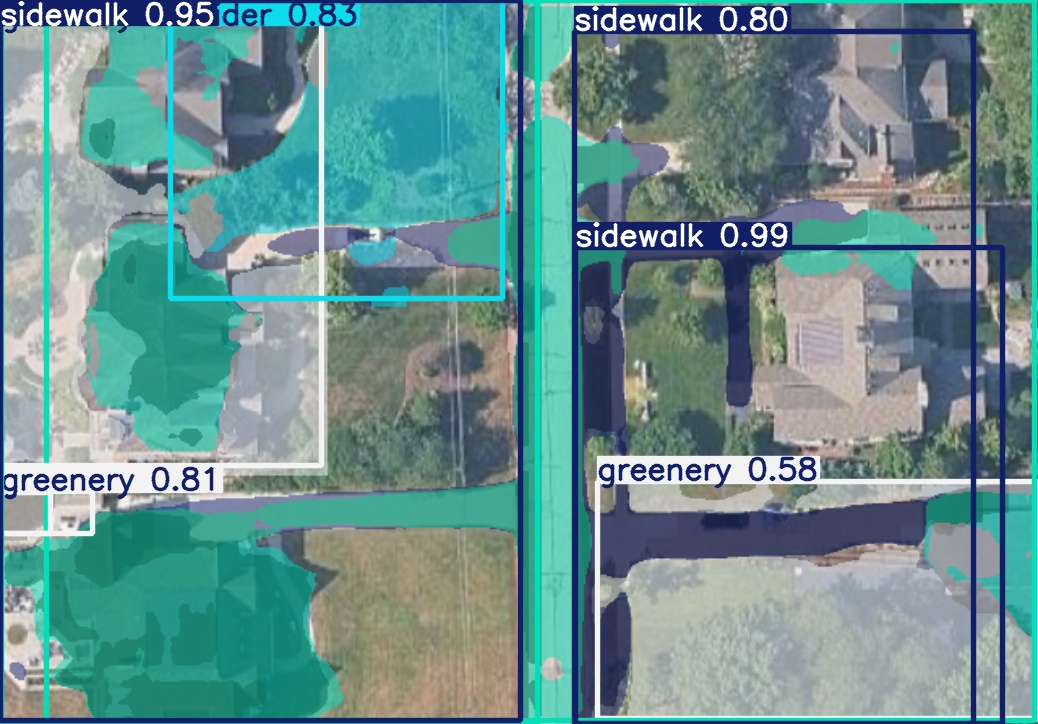

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/segment/predict/test.jpg'))


## Connv to cad

In [ ]:
import ezdxf
import numpy as np
from PIL import Image

# Input/output paths
image_path = "/content/test.png"
output_dxf_path = "/content/yolo_output_with_layers.dxf"

# Open image to get size
img = Image.open(image_path)
img_width, img_height = img.size

# Create DXF doc (R2007 allows more features)
doc = ezdxf.new(dxfversion='R2007')
msp = doc.modelspace()

# === 1. Register IMAGE layer and insert image ===
doc.layers.add(name="Image", color=8)  # gray
image_def = doc.objects.add_image_def(filename=image_path, size_in_pixel=(img_width, img_height))

image = msp.add_image(
    image_def,
    insert=(0, 0),
    size_in_units=(img_width / 10, img_height / 10),  # adjust scale
    dxfattribs={"layer": "Image"}
)

# === 2. Create separate layers for each class ===
segments = results[0].masks.xy
boxes = results[0].boxes
names = model.names

class_layers = {}  # Track created layers
class_colors = {cls_id: (cls_id % 255) + 1 for cls_id in range(len(names))}

def get_centroid(polygon):
    polygon = np.array(polygon)
    x = polygon[:, 0].mean()
    y = polygon[:, 1].mean()
    return float(x), float(y)

for seg, box in zip(segments, boxes):
    if len(seg) >= 3:
        cls_id = int(box.cls.cpu().numpy().item())
        label = names[cls_id]
        color = class_colors[cls_id]

        # Create layer if not already made
        if label not in class_layers:
            doc.layers.add(name=label, color=color)
            class_layers[label] = True

        # Add polyline to its layer
        poly = msp.add_lwpolyline(seg.tolist(), close=True, dxfattribs={"layer": label})
        poly.dxf.color = color

        # Add text label to same layer
        cx, cy = get_centroid(seg)
        text = msp.add_text(label, dxfattribs={"height": 2.5, "layer": label, "color": color})
        text.dxf.insert = (cx, cy)

# === 3. Save the DXF ===
doc.saveas(output_dxf_path)
print(f"✅ DXF with layers saved to: {output_dxf_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/test.PNG'